# Importación de librerias

In [1]:
# Importacion de librerias
import io
import sys
DATASET = "Paises.csv"
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Lectura de los datos

In [2]:
#Lectura del archivo y creacion de dataframe
data = pd.read_csv(DATASET)
data = pd.DataFrame(data)
data

,Año,ARG,BOL,BRA,CHL,COL,ECU,GUY,PRY,PER,SUR,URY,VEN,SURAMERICA
0,1900,4689224,1809836,18063384,3135464,4089052,1436214,291626,456307,3692024,94772,921056,2697074,41376033
1,1901,4859874,1836790,18469004,3176610,4169022,1455657,292375,455633,3733680,94973,941200,2730769,42215587
2,1902,5041283,1859118,18874521,3217523,4253078,1476420,292530,460702,3778753,95174,959514,2762960,43071576
3,1903,5234002,1876655,19279718,3258189,4341351,1498536,292087,471434,3827311,95377,975904,2793601,43944165
4,1904,5434089,1894354,19693613,3299365,4431454,1520982,291645,482415,3876494,95579,992573,2824578,44837141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2017,43937143,11192853,207833825,18470435,48909844,16785356,775218,6867058,31444299,570501,3436645,29402480,419625657
118,2018,44361150,11353140,209469320,18729166,49661056,17084359,779007,6956069,31989265,575987,3449290,28887117,423294926
119,2019,44780675,11513102,211049519,18952035,50339443,17373657,782775,7044639,32510462,581363,3461731,28515829,426905230
120,2020,45195777,11673029,212559409,19116209,50882884,17643060,786559,7132530,32971845,586634,3473727,28435943,430457606


In [3]:
#Funcion para separar por decadas
def split_list(lst, n):  
    for i in range(0, len(lst), n): 
        yield lst[i:i + n]

In [4]:
#Filtrado de datos y declaraciones de las variables de cada pais
ARG = data.filter(["Año","ARG"])
ARG.columns=['Año','Población']
ARG10=list(split_list(ARG,10))
BOL = data.filter(["Año","BOL"])
BOL.columns=['Año','Población']
BOL10=list(split_list(BOL,10))
BRA = data.filter(["Año","BRA"])
BRA.columns=['Año','Población']
BRA10=list(split_list(BRA,10))
CHL = data.filter(["Año","CHL"])
CHL.columns=['Año','Población']
CHL10=list(split_list(CHL,10))
COL = data.filter(["Año","COL"])
COL.columns=['Año','Población']
COL10=list(split_list(COL,10))
ECU = data.filter(["Año","ECU"])
ECU.columns=['Año','Población']
ECU10=list(split_list(ECU,10))
GUY = data.filter(["Año","GUY"])
GUY.columns=['Año','Población']
GUY10=list(split_list(GUY,10))
PRY = data.filter(["Año","PRY"])
PRY.columns=['Año','Población']
PRY10=list(split_list(PRY,10))
PER = data.filter(["Año","PER"])
PER.columns=['Año','Población']
PER10=list(split_list(PER,10))
SUR = data.filter(["Año","SUR"])
SUR.columns=['Año','Población']
SUR10=list(split_list(SUR,10))
URY = data.filter(["Año","URY"])
URY.columns=['Año','Población']
URY10=list(split_list(URY,10))
VEN = data.filter(["Año","VEN"])
VEN.columns=['Año','Población']
VEN10=list(split_list(VEN,10))
SURAMERICA = data.filter(["Año","SURAMERICA"])
SURAMERICA.columns=['Año','Población']
SURAMERICA10=list(split_list(SURAMERICA,10))

# Creación de funciones

In [5]:
# Funcion para generar los graficos por decadas
def Grafico(Pobla):  
    a=1900
    b=2021
    fig, ax = plt.subplots()
    ax.scatter(Pobla['Año'],Pobla['Población'], c="r")
    ax.plot(Pobla['Año'],Pobla['Población'], c="k", label="Poblacion")
    ax.set_title('Poblacion de entre: {} y {}'.format(a,b), loc = "center", fontdict = {'fontsize':12, 'fontweight':'bold'})
    ax.set_ylabel('Población')
    ax.set_xlabel('Años')
    ax.legend()
    plt.show()

In [6]:
# Funcion para generar los graficos por decadas
def Graficos(Pobla):  
    a=1900
    b=1909
    for i in range(0, 12, 1): 
        fig, ax = plt.subplots()
        ax.scatter(Pobla[i]['Año'],Pobla[i]['Población'], c="r")
        ax.plot(Pobla[i]['Año'],Pobla[i]['Población'], c="k", label="Poblacion")
        ax.set_title('Poblacion de entre: {} y {}'.format(a,b), loc = "center", fontdict = {'fontsize':12, 'fontweight':'bold'})
        ax.set_ylabel('Población')
        ax.set_xlabel('Años')
        ax.legend()
        a+=10
        b+=10
        plt.show()

In [7]:
# Funcion para calcular la regresion lineal de los paises por decadas
def RegresionSimp(Pobla):
    Ecua = [] 
    
    #Vectorizamos y seleccionamos los datos
    x = np.array(Pobla['Año'])
    x = x.reshape(-1,1)
    y = np.array(Pobla['Población'])
    
    regresion_lineal = LinearRegression() # Creamos una instancia de LinearRegression
        
    # Instruimos a la regresión lineal que aprenda de los datos (ahora polinómicos) (X,y)
    regresion_lineal.fit(x, y)
    
    # Calculamos el coeficiente de determinación R2
    r2 = regresion_lineal.score(x, y)
    
    # Vemos los parámetros que ha estimado la regresión lineal
    a = regresion_lineal.coef_
    b = regresion_lineal.intercept_
    print(a)
    
    # Predecimos los valores y para los datos usados en el entrenamiento
    prediccion_entrenamiento = np.round(regresion_lineal.predict(x))
    # Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
    mse = mean_squared_error(y_true = y, y_pred = prediccion_entrenamiento)
    # La raíz cuadrada del MSE es el RMSE
    rmse = np.sqrt(mse)
    
    print("El coeficiente de determinacion es: {}.\n\nLa ecuacion de la recta es: {}x + {}".format(r2,a,b))
    print('\nError Cuadrático Medio (MSE) = ' + str(mse))
    print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))
    
    Ecua.append(a)
    Ecua.append(b)
    
    return Ecua, prediccion_entrenamiento

In [8]:
# Funcion para calcular la regresion lineal de los paises por decadas
def RegresionPoli(Pobla):
    Ecua = [] 
    
    #Vectorizamos y seleccionamos los datos
    x = np.array(Pobla['Año'])
    y = np.array(Pobla['Población'])
        
    pf = PolynomialFeatures(degree = 2)    # Usaremos polinomios de grado 2
    X = pf.fit_transform(x.reshape(-1,1))  # Transformamos la entrada en polinómica
    regresion_lineal = LinearRegression() # Creamos una instancia de LinearRegression
        
    # Instruimos a la regresión lineal que aprenda de los datos (ahora polinómicos) (X,y)
    regresion_lineal.fit(X, y)
    
    # Calculamos el coeficiente de determinación R2
    r2 = regresion_lineal.score(X, y)
    
    # Vemos los parámetros que ha estimado la regresión lineal
    a = regresion_lineal.coef_[-1]
    b = regresion_lineal.coef_[-2]
    c = regresion_lineal.intercept_
    
    # Predecimos los valores y para los datos usados en el entrenamiento
    prediccion_entrenamiento = np.round(regresion_lineal.predict(X))
    # Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
    mse = mean_squared_error(y_true = y, y_pred = prediccion_entrenamiento)
    # La raíz cuadrada del MSE es el RMSE
    rmse = np.sqrt(mse)
    
    print("El coeficiente de determinacion es: {}.\n\nLa ecuacion del polinomio es: {}x^2 + {}x + {}".format(r2,a,b,c))
    print('\nError Cuadrático Medio (MSE) = ' + str(mse))
    print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))
    
    Ecua.append(a)
    Ecua.append(b)
    Ecua.append(c)
    
    return Ecua, prediccion_entrenamiento

In [9]:
# Funcion para calcular la regresion lineal de los paises por decadas
def RegresionesDeca(Pobla):
    o = 1900
    f = 1909
    Regxdeca = [] # lista donde se guardaran la pendiente y el intercepto final
    for i in range(0, 13, 1): 
        #Vectorizamos y seleccionamos los datos
        X = np.array(Pobla[i]['Año'])
        Y = np.array(Pobla[i]['Población'])
        
        #Realizamos los calculos previos a la regresion lineal
        Sx = sum(X) 
        Sy = sum(Y) 
        V = np.log(Y)
        Sv = sum(V)
        XV = X*V
        Sxv = sum(XV)
        X2 = X**2
        Sx2 = sum(X2)
        V2 = V**2
        Sv2 = sum(V2)  
        
        
        #Coeficiente de determinacion
        R = (10*Sxv-(Sx*Sv))/(np.sqrt((10*Sx2-(Sx**2))*(10*Sv2-(Sv**2))))
        #Pendiente
        B = (10*Sxv-(Sx*Sv))/(10*Sx2-(Sx**2))
        #intercepto
        A = (Sv-B*Sx)/10
        Pendi = np.exp(B) 
        Intercep = np.exp(A)
        f = f if (i<12) else 2021 
        print('Poblacion de entre: {} y {}'.format(o,f))
        print("El coeficiente de determinacion es: {}.\nLa pendiente de la recta es: {}.\nEl intercepto de la recta es: {}.\n".format(R,Pendi,Intercep))
        o += 10
        f += 10
        
        Regre = [Intercep,Pendi]
        Regxdeca.append(Regre)
    return Regxdeca

In [10]:
# Funcion para evaluar la proyecciones de nuesto modelo de regresion lineal
def ProyGr(Vari):
    o = 1900
    for i in range(0, 121, 1): 
        # Inicializacion de las variales
        y = Vari[i]
        print("Para el año {} se estima una poblacion de: {}".format(o,y))
        o += 1

In [11]:
# Funcion para evaluar la proyecciones de nuesto modelo de regresion lineal
def ProyDeca(Vari):
    o = 1900
    Prodeca = [] # Lista donde se guardaran las predicciones por decadas 
    for i in range(0, 13, 1): 
        # Inicializacion de las variales
        x = o
        a = Vari[i][0]
        b = Vari[i][1]
        
        # Calculo de las proyecciones
        y = round(a*np.power(b,x))
        Pro = [o,y]
        print("Para el año {} se estima una poblacion de: {}".format(o,y))
        Prodeca.append(Pro)
        o += 10
        
    return Prodeca

In [12]:
def IndiCreci(Vari):
    o = 1900
    Indeca = [0]
    for i in range(1, 122, 1): 
        Pob_o = Vari[i-1]
        Pob_F = Vari[i] if (i<122) else 0
        i = round((np.power((Pob_F/Pob_o),(1/1))-1)*100,3)
        print("Entre los años {} y {} hubo una tasa de crecimiento poblacional de: {}%".format(o,o+1,i))
        Indeca.append(i)
        o += 1
    Prom = np.round(sum(Indeca)/121,3)
    print("El promedio de la tasa de crecimiento poblacional de por año es: {}%".format(Prom))
    return Indeca, Prom

In [13]:
def IndiCreciDeca(Vari):
    o = 1900
    f = o+10
    Indeca = []
    for i in range(0, 12, 1): 
        t = 10
        Pob_o = Vari[i][1]
        Pob_F = Vari[i+1][1] if (i<12) else 0
        i = round((np.power((Pob_F/Pob_o),(1/t))-1)*100,3)
        f = f if (i<12) else 2021 
        print("En la decada comprendida entre {} y {} hubo una tasa de crecimiento poblacional de: {}%".format(o,f,i))
        Indeca.append(i)
        o += 10
        f += 10
    Prom = np.round(sum(Indeca)/12,3)
    print("El promedio de la tasa de crecimiento poblacional de por década es: {}%".format(Prom))
    return Indeca, Prom

# Análisis de paises

La población tiene un notorio crecimiento poblacional, por lo que se recomendaría aplicar un crecimiento geométrico o exponencial

$Pob_O =$ Población inicial<br>
$Pob_F =$ Población final<br>
$t =$ Diferencia entre años<br>
$i =$ Indice crecimiento poblacional<br>
<br>
<center>
$Pob_F = Pob_O(1+i)^t$
    
Por lo tanto podemos igualar esta funcion a estas variables 
    
$Pob_O = y$<br>
$Pob_F = a$<br>
$(1+i) = b$<br>
$t = x$<br>
    
Quedandonos la siguiente función 

\begin{eqnarray}
Pob_F&=& Pob_O(1+i)^t\\
    y&=& a.b^x\\
ln(y)&=& ln(a.b^x)\\
ln(y)&=& ln(a)+x.ln(b)
\end{eqnarray}

Igualando la ultima funcion a estas variables nos queda 
    
$ln(y) = v$<br>
$ln(a) = A$<br>
$ln(b) = B$<br>

<br>
<center>
$v = A+xB$<br>
    
Obteniendo asi una regresion lineal. Para estimar el indice de crecimiento poblacional se aplica el siguiente despeje en la primera función.
    
<br>
<center>
$i = (\frac{Pob_F}{Pob_O})^{\frac{1}{t}}$   

## Suramérica

In [14]:
Ecuacion, Proyecciones = RegresionPoli(SURAMERICA)

El coeficiente de determinacion es: 0.9955112932472057.

La ecuacion del polinomio es: 25500.50253040956x^2 + -96502343.14507295x + 91337807119.1964

Error Cuadrático Medio (MSE) = 71531128945240.52
Raíz del Error Cuadrático Medio (RMSE) = 8457607.755461382


In [15]:
ProyGr(Proyecciones)

Para el año 1900 se estima una poblacion de: 40169278.0
Para el año 1901 se estima una poblacion de: 40594345.0
Para el año 1902 se estima una poblacion de: 41070413.0
Para el año 1903 se estima una poblacion de: 41597482.0
Para el año 1904 se estima una poblacion de: 42175552.0
Para el año 1905 se estima una poblacion de: 42804623.0
Para el año 1906 se estima una poblacion de: 43484695.0
Para el año 1907 se estima una poblacion de: 44215768.0
Para el año 1908 se estima una poblacion de: 44997842.0
Para el año 1909 se estima una poblacion de: 45830917.0
Para el año 1910 se estima una poblacion de: 46714993.0
Para el año 1911 se estima una poblacion de: 47650070.0
Para el año 1912 se estima una poblacion de: 48636148.0
Para el año 1913 se estima una poblacion de: 49673227.0
Para el año 1914 se estima una poblacion de: 50761307.0
Para el año 1915 se estima una poblacion de: 51900388.0
Para el año 1916 se estima una poblacion de: 53090471.0
Para el año 1917 se estima una poblacion de: 543

In [16]:
TasaCreci, Prom = IndiCreci(Proyecciones)

Entre los años 1900 y 1901 hubo una tasa de crecimiento poblacional de: 1.058%
Entre los años 1901 y 1902 hubo una tasa de crecimiento poblacional de: 1.173%
Entre los años 1902 y 1903 hubo una tasa de crecimiento poblacional de: 1.283%
Entre los años 1903 y 1904 hubo una tasa de crecimiento poblacional de: 1.39%
Entre los años 1904 y 1905 hubo una tasa de crecimiento poblacional de: 1.492%
Entre los años 1905 y 1906 hubo una tasa de crecimiento poblacional de: 1.589%
Entre los años 1906 y 1907 hubo una tasa de crecimiento poblacional de: 1.681%
Entre los años 1907 y 1908 hubo una tasa de crecimiento poblacional de: 1.769%
Entre los años 1908 y 1909 hubo una tasa de crecimiento poblacional de: 1.851%
Entre los años 1909 y 1910 hubo una tasa de crecimiento poblacional de: 1.929%
Entre los años 1910 y 1911 hubo una tasa de crecimiento poblacional de: 2.002%
Entre los años 1911 y 1912 hubo una tasa de crecimiento poblacional de: 2.069%
Entre los años 1912 y 1913 hubo una tasa de crecimien

In [17]:
print("Proyecciones de poblacion para años futuros\n") 
Proy = []
for i in range (0,9,1):
    x = [2022,2023,2024,2025,2026,2027,2028,2029,2030]
    y = np.round(Ecuacion[0]*(np.power(x[i],2)) + Ecuacion[1]*(x[i]) + Ecuacion[2])
    Proy.append(y)
    print("Para el año {} se estima una poblacion de: {}".format(x[i],y))
    
print("\n\nTasa de crecimiento para años futuros\n")    
o = 2022
Indeca = [0]
for i in range(1, 9, 1): 
    Pob_o = Proy[i-1]
    Pob_F = Proy[i] if (i<10) else 0 
    i = round((np.power((Pob_F/Pob_o),(1/1))-1)*100,3)
    print("Entre los años {} y {} hubo una tasa de crecimiento poblacional de: {}%".format(o,o+1,i))
    Indeca.append(i)
    o += 1
Prom = np.round(sum(Indeca)/9,3)
print("El promedio de la tasa de crecimiento poblacional de por año es: {}%".format(Prom))

Proyecciones de poblacion para años futuros

Para el año 2022 se estima una poblacion de: 468465867.0
Para el año 2023 se estima una poblacion de: 475113057.0
Para el año 2024 se estima una poblacion de: 481811248.0
Para el año 2025 se estima una poblacion de: 488560439.0
Para el año 2026 se estima una poblacion de: 495360632.0
Para el año 2027 se estima una poblacion de: 502211825.0
Para el año 2028 se estima una poblacion de: 509114020.0
Para el año 2029 se estima una poblacion de: 516067216.0
Para el año 2030 se estima una poblacion de: 523071412.0


Tasa de crecimiento para años futuros

Entre los años 2022 y 2023 hubo una tasa de crecimiento poblacional de: 1.419%
Entre los años 2023 y 2024 hubo una tasa de crecimiento poblacional de: 1.41%
Entre los años 2024 y 2025 hubo una tasa de crecimiento poblacional de: 1.401%
Entre los años 2025 y 2026 hubo una tasa de crecimiento poblacional de: 1.392%
Entre los años 2026 y 2027 hubo una tasa de crecimiento poblacional de: 1.383%
Entre l

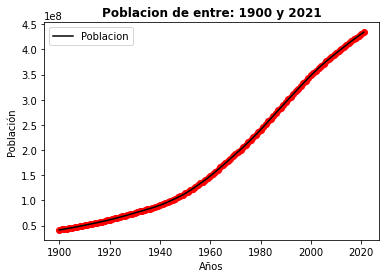

In [18]:
Grafico(SURAMERICA)

## Suramérica por décadas

### Regresiones, proyecciones y tasas de crecimiento de Suramérica por décadas

In [19]:
ResulRegre = RegresionesDeca(SURAMERICA10)

Poblacion de entre: 1900 y 1909
El coeficiente de determinacion es: 0.9999967375738074.
La pendiente de la recta es: 1.0203871156958624.
El intercepto de la recta es: 9.188069427334803e-10.

Poblacion de entre: 1910 y 1919
El coeficiente de determinacion es: 0.9999976267318611.
La pendiente de la recta es: 1.0197641319503525.
El intercepto de la recta es: 2.9508257149092408e-09.

Poblacion de entre: 1920 y 1929
El coeficiente de determinacion es: 0.9999966563416776.
La pendiente de la recta es: 1.0202354137548506.
El intercepto de la recta es: 1.2147897473941563e-09.

Poblacion de entre: 1930 y 1939
El coeficiente de determinacion es: 0.9999813395870325.
La pendiente de la recta es: 1.0183975328980104.
El intercepto de la recta es: 3.941783026644851e-08.

Poblacion de entre: 1940 y 1949
El coeficiente de determinacion es: 0.9999210852227075.
La pendiente de la recta es: 1.0230455645784577.
El intercepto de la recta es: 5.744892961018143e-12.

Poblacion de entre: 1950 y 1959
El coeficie

In [20]:
ResulPro = ProyDeca(ResulRegre)

Para el año 1900 se estima una poblacion de: 41367572
Para el año 1910 se estima una poblacion de: 50632882
Para el año 1920 se estima una poblacion de: 61554298
Para el año 1930 se estima una poblacion de: 75189314
Para el año 1940 se estima una poblacion de: 90268657
Para el año 1950 se estima una poblacion de: 113759540
Para el año 1960 se estima una poblacion de: 148939605
Para el año 1970 se estima una poblacion de: 192170541
Para el año 1980 se estima una poblacion de: 240986821
Para el año 1990 se estima una poblacion de: 295921653
Para el año 2000 se estima una poblacion de: 349231872
Para el año 2010 se estima una poblacion de: 392813679
Para el año 2020 se estima una poblacion de: 430078772


In [21]:
TasasCreci = IndiCreciDeca(ResulPro)

En la decada comprendida entre 1900 y 1910 hubo una tasa de crecimiento poblacional de: 2.042%
En la decada comprendida entre 1910 y 1920 hubo una tasa de crecimiento poblacional de: 1.972%
En la decada comprendida entre 1920 y 1930 hubo una tasa de crecimiento poblacional de: 2.021%
En la decada comprendida entre 1930 y 1940 hubo una tasa de crecimiento poblacional de: 1.845%
En la decada comprendida entre 1940 y 1950 hubo una tasa de crecimiento poblacional de: 2.34%
En la decada comprendida entre 1950 y 1960 hubo una tasa de crecimiento poblacional de: 2.731%
En la decada comprendida entre 1960 y 1970 hubo una tasa de crecimiento poblacional de: 2.581%
En la decada comprendida entre 1970 y 1980 hubo una tasa de crecimiento poblacional de: 2.289%
En la decada comprendida entre 1980 y 1990 hubo una tasa de crecimiento poblacional de: 2.075%
En la decada comprendida entre 1990 y 2000 hubo una tasa de crecimiento poblacional de: 1.67%
En la decada comprendida entre 2000 y 2010 hubo una 

### Graficos de Suramérica por décadas

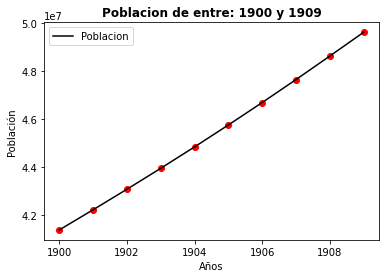

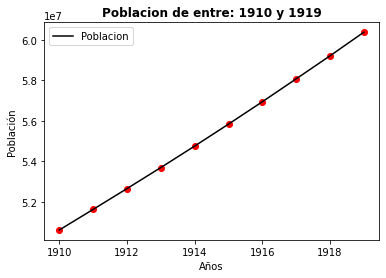

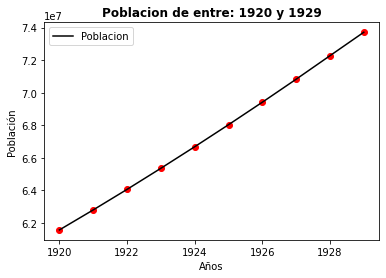

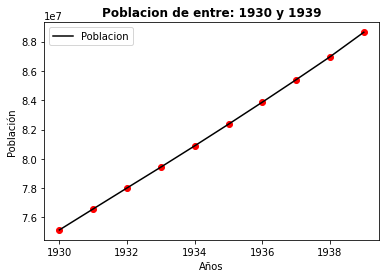

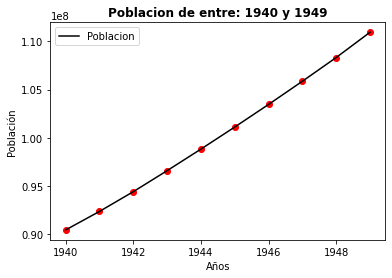

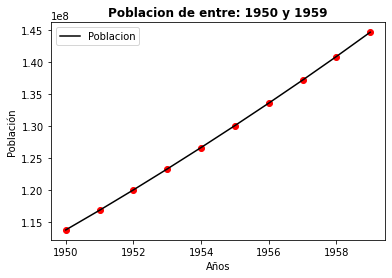

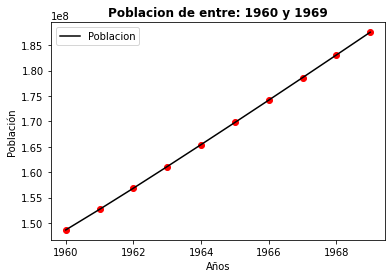

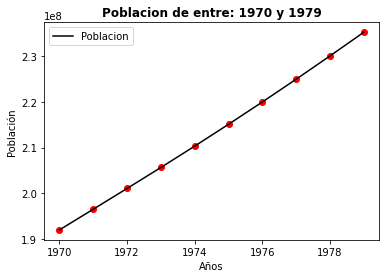

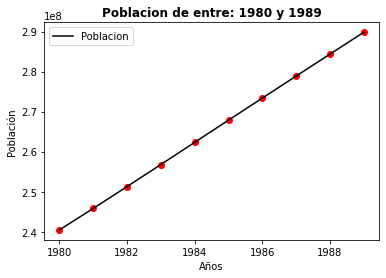

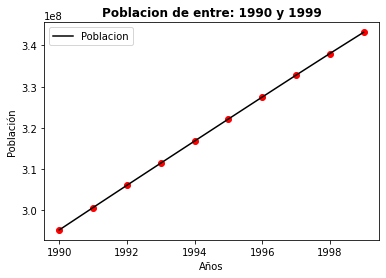

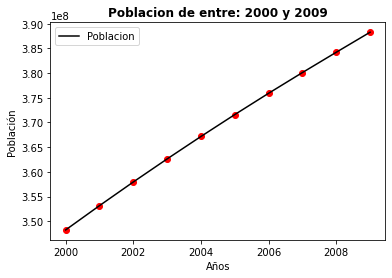

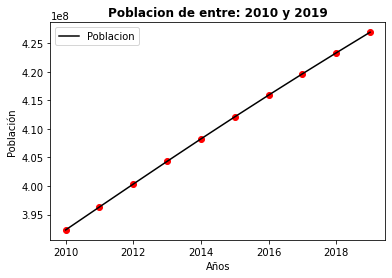

In [22]:
Graficos(SURAMERICA10)

## Argentina

In [23]:
Ecuacion, Proyecciones = RegresionPoli(ARG)

El coeficiente de determinacion es: 0.9994835144523169.

La ecuacion del polinomio es: 1287.3236055661419x^2 + -4702653.987366896x + 4292422911.7017703

Error Cuadrático Medio (MSE) = 77311295966.12296
Raíz del Error Cuadrático Medio (RMSE) = 278049.0891301803


In [24]:
ProyGr(Proyecciones)

Para el año 1900 se estima una poblacion de: 4618552.0
Para el año 1901 se estima una poblacion de: 4809015.0
Para el año 1902 se estima una poblacion de: 5002053.0
Para el año 1903 se estima una poblacion de: 5197665.0
Para el año 1904 se estima una poblacion de: 5395852.0
Para el año 1905 se estima una poblacion de: 5596613.0
Para el año 1906 se estima una poblacion de: 5799950.0
Para el año 1907 se estima una poblacion de: 6005861.0
Para el año 1908 se estima una poblacion de: 6214346.0
Para el año 1909 se estima una poblacion de: 6425406.0
Para el año 1910 se estima una poblacion de: 6639041.0
Para el año 1911 se estima una poblacion de: 6855251.0
Para el año 1912 se estima una poblacion de: 7074035.0
Para el año 1913 se estima una poblacion de: 7295394.0
Para el año 1914 se estima una poblacion de: 7519327.0
Para el año 1915 se estima una poblacion de: 7745835.0
Para el año 1916 se estima una poblacion de: 7974918.0
Para el año 1917 se estima una poblacion de: 8206575.0
Para el añ

In [25]:
TasaCreci, Prom = IndiCreci(Proyecciones)

Entre los años 1900 y 1901 hubo una tasa de crecimiento poblacional de: 4.124%
Entre los años 1901 y 1902 hubo una tasa de crecimiento poblacional de: 4.014%
Entre los años 1902 y 1903 hubo una tasa de crecimiento poblacional de: 3.911%
Entre los años 1903 y 1904 hubo una tasa de crecimiento poblacional de: 3.813%
Entre los años 1904 y 1905 hubo una tasa de crecimiento poblacional de: 3.721%
Entre los años 1905 y 1906 hubo una tasa de crecimiento poblacional de: 3.633%
Entre los años 1906 y 1907 hubo una tasa de crecimiento poblacional de: 3.55%
Entre los años 1907 y 1908 hubo una tasa de crecimiento poblacional de: 3.471%
Entre los años 1908 y 1909 hubo una tasa de crecimiento poblacional de: 3.396%
Entre los años 1909 y 1910 hubo una tasa de crecimiento poblacional de: 3.325%
Entre los años 1910 y 1911 hubo una tasa de crecimiento poblacional de: 3.257%
Entre los años 1911 y 1912 hubo una tasa de crecimiento poblacional de: 3.191%
Entre los años 1912 y 1913 hubo una tasa de crecimien

In [26]:
print("Proyecciones de poblacion para años futuros\n") 
Proy = []
for i in range (0,9,1):
    x = [2022,2023,2024,2025,2026,2027,2028,2029,2030]
    y = np.round(Ecuacion[0]*(np.power(x[i],2)) + Ecuacion[1]*(x[i]) + Ecuacion[2])
    Proy.append(y)
    print("Para el año {} se estima una poblacion de: {}".format(x[i],y))
    
print("\n\nTasa de crecimiento para años futuros\n")    
o = 2022
Indeca = [0]
for i in range(1, 9, 1): 
    Pob_o = Proy[i-1]
    Pob_F = Proy[i] if (i<10) else 0 
    i = round((np.power((Pob_F/Pob_o),(1/1))-1)*100,3)
    print("Entre los años {} y {} hubo una tasa de crecimiento poblacional de: {}%".format(o,o+1,i))
    Indeca.append(i)
    o += 1
Prom = np.round(sum(Indeca)/9,3)
print("El promedio de la tasa de crecimiento poblacional de por año es: {}%".format(Prom))

Proyecciones de poblacion para años futuros

Para el año 2022 se estima una poblacion de: 46858513.0
Para el año 2023 se estima una poblacion de: 47363083.0
Para el año 2024 se estima una poblacion de: 47870228.0
Para el año 2025 se estima una poblacion de: 48379947.0
Para el año 2026 se estima una poblacion de: 48892241.0
Para el año 2027 se estima una poblacion de: 49407110.0
Para el año 2028 se estima una poblacion de: 49924553.0
Para el año 2029 se estima una poblacion de: 50444571.0
Para el año 2030 se estima una poblacion de: 50967164.0


Tasa de crecimiento para años futuros

Entre los años 2022 y 2023 hubo una tasa de crecimiento poblacional de: 1.077%
Entre los años 2023 y 2024 hubo una tasa de crecimiento poblacional de: 1.071%
Entre los años 2024 y 2025 hubo una tasa de crecimiento poblacional de: 1.065%
Entre los años 2025 y 2026 hubo una tasa de crecimiento poblacional de: 1.059%
Entre los años 2026 y 2027 hubo una tasa de crecimiento poblacional de: 1.053%
Entre los años 

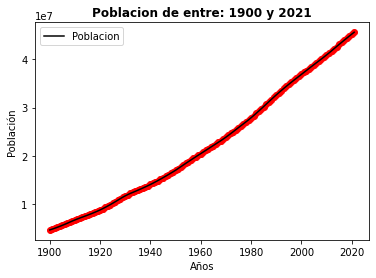

In [27]:
Grafico(ARG)

### Regresiones, proyecciones y tasas de crecimiento de Argentina por décadas

In [28]:
ResulRegre = RegresionesDeca(ARG10)

Poblacion de entre: 1900 y 1909
El coeficiente de determinacion es: 0.9999756096938675.
La pendiente de la recta es: 1.0378990797760816.
El intercepto de la recta es: 9.459705652250184e-25.

Poblacion de entre: 1910 y 1919
El coeficiente de determinacion es: 0.999805290204476.
La pendiente de la recta es: 1.0267104287402935.
El intercepto de la recta es: 9.238310559654126e-16.

Poblacion de entre: 1920 y 1929
El coeficiente de determinacion es: 0.999967350813684.
La pendiente de la recta es: 1.029608884227018.
El intercepto de la recta es: 4.119025613140205e-18.

Poblacion de entre: 1930 y 1939
El coeficiente de determinacion es: 0.9995244286690149.
La pendiente de la recta es: 1.0181416910333316.
El intercepto de la recta es: 1.0034285277474584e-08.

Poblacion de entre: 1940 y 1949
El coeficiente de determinacion es: 0.9999925678793966.
La pendiente de la recta es: 1.019206185113719.
El intercepto de la recta es: 1.3197124406732316e-09.

Poblacion de entre: 1950 y 1959
El coeficiente 

In [29]:
ResulPro = ProyDeca(ResulRegre)

Para el año 1900 se estima una poblacion de: 4684020
Para el año 1910 se estima una poblacion de: 6779875
Para el año 1920 se estima una poblacion de: 8822154
Para el año 1930 se estima una poblacion de: 11785654
Para el año 1940 se estima una poblacion de: 14088260
Para el año 1950 se estima una poblacion de: 17086602
Para el año 1960 se estima una poblacion de: 20509127
Para el año 1970 se estima una poblacion de: 23899705
Para el año 1980 se estima una poblacion de: 27902600
Para el año 1990 se estima una poblacion de: 32694770
Para el año 2000 se estima una poblacion de: 36903392
Para el año 2010 se estima una poblacion de: 40921128
Para el año 2020 se estima una poblacion de: 45202687


In [30]:
TasasCreci = IndiCreciDeca(ResulPro)

En la decada comprendida entre 1900 y 1910 hubo una tasa de crecimiento poblacional de: 3.767%
En la decada comprendida entre 1910 y 1920 hubo una tasa de crecimiento poblacional de: 2.668%
En la decada comprendida entre 1920 y 1930 hubo una tasa de crecimiento poblacional de: 2.939%
En la decada comprendida entre 1930 y 1940 hubo una tasa de crecimiento poblacional de: 1.801%
En la decada comprendida entre 1940 y 1950 hubo una tasa de crecimiento poblacional de: 1.948%
En la decada comprendida entre 1950 y 1960 hubo una tasa de crecimiento poblacional de: 1.843%
En la decada comprendida entre 1960 y 1970 hubo una tasa de crecimiento poblacional de: 1.542%
En la decada comprendida entre 1970 y 1980 hubo una tasa de crecimiento poblacional de: 1.561%
En la decada comprendida entre 1980 y 1990 hubo una tasa de crecimiento poblacional de: 1.598%
En la decada comprendida entre 1990 y 2000 hubo una tasa de crecimiento poblacional de: 1.218%
En la decada comprendida entre 2000 y 2010 hubo un

### Gráficos de Argentina por décadas

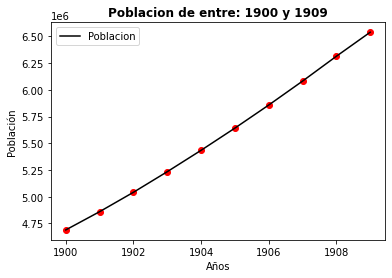

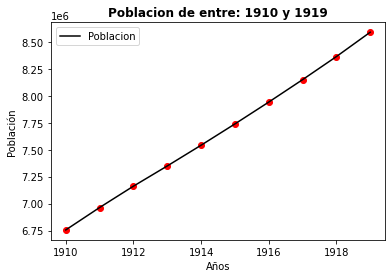

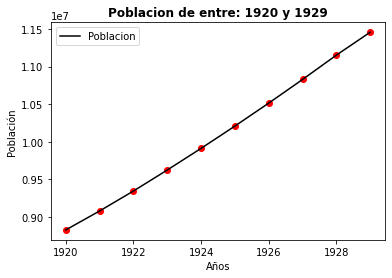

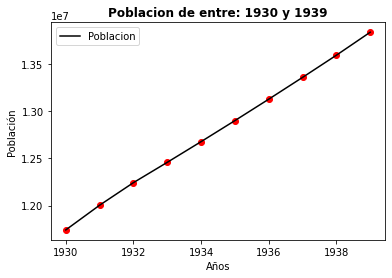

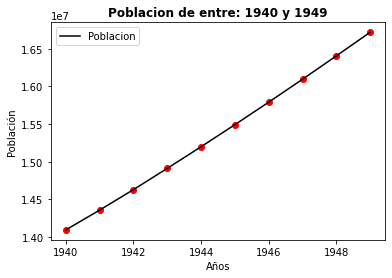

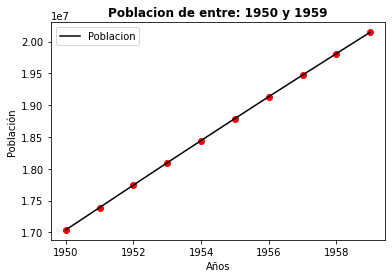

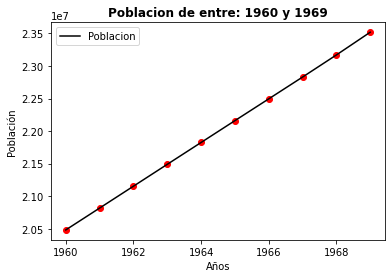

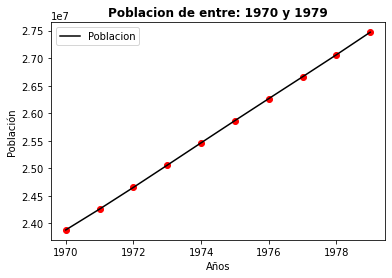

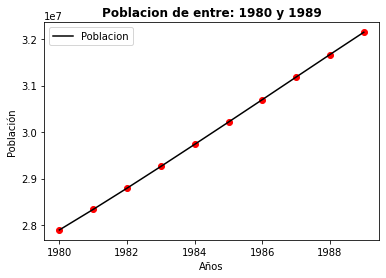

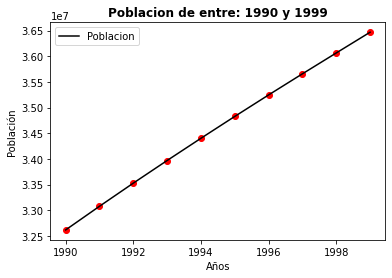

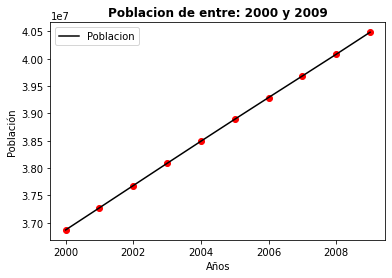

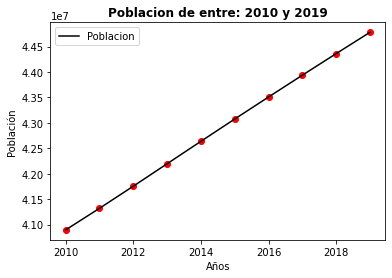

In [31]:
Graficos(ARG10)

## Bolivia

In [32]:
Ecuacion, Proyecciones = RegresionPoli(BOL)

El coeficiente de determinacion es: 0.9950396450027161.

La ecuacion del polinomio es: 875.8079561610919x^2 + -3355525.0190787334x + 3216164984.4713855

Error Cuadrático Medio (MSE) = 42821566072.565575
Raíz del Error Cuadrático Medio (RMSE) = 206933.72386482966


In [33]:
ProyGr(Proyecciones)

Para el año 1900 se estima una poblacion de: 2334170.0
Para el año 1901 se estima una poblacion de: 2307591.0
Para el año 1902 se estima una poblacion de: 2282764.0
Para el año 1903 se estima una poblacion de: 2259688.0
Para el año 1904 se estima una poblacion de: 2238364.0
Para el año 1905 se estima una poblacion de: 2218791.0
Para el año 1906 se estima una poblacion de: 2200970.0
Para el año 1907 se estima una poblacion de: 2184901.0
Para el año 1908 se estima una poblacion de: 2170583.0
Para el año 1909 se estima una poblacion de: 2158017.0
Para el año 1910 se estima una poblacion de: 2147203.0
Para el año 1911 se estima una poblacion de: 2138140.0
Para el año 1912 se estima una poblacion de: 2130829.0
Para el año 1913 se estima una poblacion de: 2125269.0
Para el año 1914 se estima una poblacion de: 2121461.0
Para el año 1915 se estima una poblacion de: 2119405.0
Para el año 1916 se estima una poblacion de: 2119100.0
Para el año 1917 se estima una poblacion de: 2120547.0
Para el añ

In [34]:
TasaCreci, Prom = IndiCreci(Proyecciones)

Entre los años 1900 y 1901 hubo una tasa de crecimiento poblacional de: -1.139%
Entre los años 1901 y 1902 hubo una tasa de crecimiento poblacional de: -1.076%
Entre los años 1902 y 1903 hubo una tasa de crecimiento poblacional de: -1.011%
Entre los años 1903 y 1904 hubo una tasa de crecimiento poblacional de: -0.944%
Entre los años 1904 y 1905 hubo una tasa de crecimiento poblacional de: -0.874%
Entre los años 1905 y 1906 hubo una tasa de crecimiento poblacional de: -0.803%
Entre los años 1906 y 1907 hubo una tasa de crecimiento poblacional de: -0.73%
Entre los años 1907 y 1908 hubo una tasa de crecimiento poblacional de: -0.655%
Entre los años 1908 y 1909 hubo una tasa de crecimiento poblacional de: -0.579%
Entre los años 1909 y 1910 hubo una tasa de crecimiento poblacional de: -0.501%
Entre los años 1910 y 1911 hubo una tasa de crecimiento poblacional de: -0.422%
Entre los años 1911 y 1912 hubo una tasa de crecimiento poblacional de: -0.342%
Entre los años 1912 y 1913 hubo una tasa 

In [35]:
print("Proyecciones de poblacion para años futuros\n") 
Proy = []
for i in range (0,9,1):
    x = [2022,2023,2024,2025,2026,2027,2028,2029,2030]
    y = np.round(Ecuacion[0]*(np.power(x[i],2)) + Ecuacion[1]*(x[i]) + Ecuacion[2])
    Proy.append(y)
    print("Para el año {} se estima una poblacion de: {}".format(x[i],y))
    
print("\n\nTasa de crecimiento para años futuros\n")    
o = 2022
Indeca = [0]
for i in range(1, 9, 1): 
    Pob_o = Proy[i-1]
    Pob_F = Proy[i] if (i<10) else 0 
    i = round((np.power((Pob_F/Pob_o),(1/1))-1)*100,3)
    print("Entre los años {} y {} hubo una tasa de crecimiento poblacional de: {}%".format(o,o+1,i))
    Indeca.append(i)
    o += 1
Prom = np.round(sum(Indeca)/9,3)
print("El promedio de la tasa de crecimiento poblacional de por año es: {}%".format(Prom))

Proyecciones de poblacion para años futuros

Para el año 2022 se estima una poblacion de: 12020212.0
Para el año 2023 se estima una poblacion de: 12207330.0
Para el año 2024 se estima una poblacion de: 12396200.0
Para el año 2025 se estima una poblacion de: 12586821.0
Para el año 2026 se estima una poblacion de: 12779194.0
Para el año 2027 se estima una poblacion de: 12973319.0
Para el año 2028 se estima una poblacion de: 13169195.0
Para el año 2029 se estima una poblacion de: 13366823.0
Para el año 2030 se estima una poblacion de: 13566202.0


Tasa de crecimiento para años futuros

Entre los años 2022 y 2023 hubo una tasa de crecimiento poblacional de: 1.557%
Entre los años 2023 y 2024 hubo una tasa de crecimiento poblacional de: 1.547%
Entre los años 2024 y 2025 hubo una tasa de crecimiento poblacional de: 1.538%
Entre los años 2025 y 2026 hubo una tasa de crecimiento poblacional de: 1.528%
Entre los años 2026 y 2027 hubo una tasa de crecimiento poblacional de: 1.519%
Entre los años 

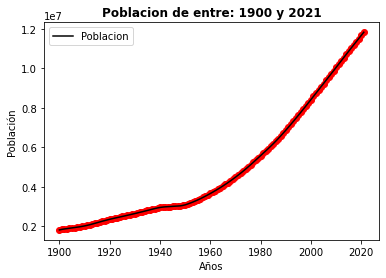

In [36]:
Grafico(BOL)

### Regresiones, proyecciones y tasas de crecimiento de Bolivia por décadas

In [37]:
ResulRegre = RegresionesDeca(BOL10)

Poblacion de entre: 1900 y 1909
El coeficiente de determinacion es: 0.998014446956707.
La pendiente de la recta es: 1.0100692080296205.
El intercepto de la recta es: 0.009825619552947381.

Poblacion de entre: 1910 y 1919
El coeficiente de determinacion es: 0.9997690274095492.
La pendiente de la recta es: 1.0160534194631659.
El intercepto de la recta es: 1.237251132829054e-07.

Poblacion de entre: 1920 y 1929
El coeficiente de determinacion es: 0.9998946456598944.
La pendiente de la recta es: 1.0117399307765562.
El intercepto de la recta es: 0.00043546583550949504.

Poblacion de entre: 1930 y 1939
El coeficiente de determinacion es: 0.9999035941327303.
La pendiente de la recta es: 1.0115005208818388.
El intercepto de la recta es: 0.0006874027805318394.

Poblacion de entre: 1940 y 1949
El coeficiente de determinacion es: 0.9908149102644168.
La pendiente de la recta es: 1.0033581352480951.
El intercepto de la recta es: 4424.739048640212.

Poblacion de entre: 1950 y 1959
El coeficiente de 

In [38]:
ResulPro = ProyDeca(ResulRegre)

Para el año 1900 se estima una poblacion de: 1817651
Para el año 1910 se estima una poblacion de: 2009336
Para el año 1920 se estima una poblacion de: 2350848
Para el año 1930 se estima una poblacion de: 2641223
Para el año 1940 se estima una poblacion de: 2954484
Para el año 1950 se estima una poblacion de: 3068086
Para el año 1960 se estima una poblacion de: 3652516
Para el año 1970 se estima una poblacion de: 4481832
Para el año 1980 se estima una poblacion de: 5578098
Para el año 1990 se estima una poblacion de: 6872144
Para el año 2000 se estima una poblacion de: 8433827
Para el año 2010 se estima una poblacion de: 10066016
Para el año 2020 se estima una poblacion de: 11705467


In [39]:
TasasCreci = IndiCreciDeca(ResulPro)

En la decada comprendida entre 1900 y 1910 hubo una tasa de crecimiento poblacional de: 1.008%
En la decada comprendida entre 1910 y 1920 hubo una tasa de crecimiento poblacional de: 1.582%
En la decada comprendida entre 1920 y 1930 hubo una tasa de crecimiento poblacional de: 1.171%
En la decada comprendida entre 1930 y 1940 hubo una tasa de crecimiento poblacional de: 1.127%
En la decada comprendida entre 1940 y 1950 hubo una tasa de crecimiento poblacional de: 0.378%
En la decada comprendida entre 1950 y 1960 hubo una tasa de crecimiento poblacional de: 1.759%
En la decada comprendida entre 1960 y 1970 hubo una tasa de crecimiento poblacional de: 2.067%
En la decada comprendida entre 1970 y 1980 hubo una tasa de crecimiento poblacional de: 2.212%
En la decada comprendida entre 1980 y 1990 hubo una tasa de crecimiento poblacional de: 2.108%
En la decada comprendida entre 1990 y 2000 hubo una tasa de crecimiento poblacional de: 2.069%
En la decada comprendida entre 2000 y 2010 hubo un

### Gráficos de Bolivia por décadas

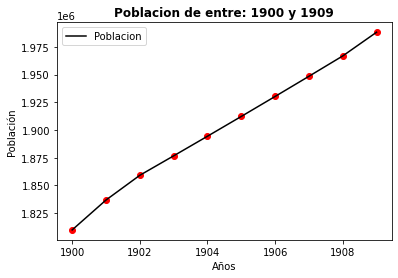

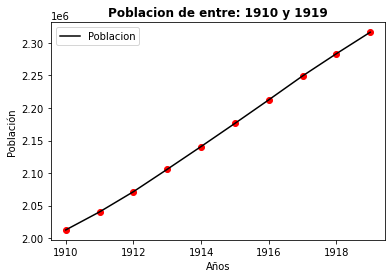

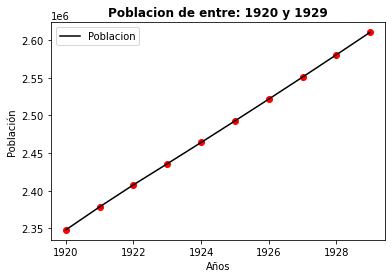

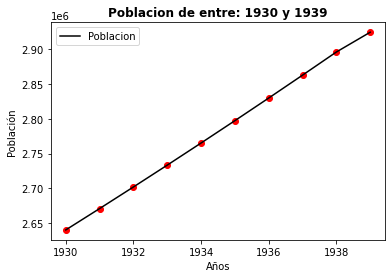

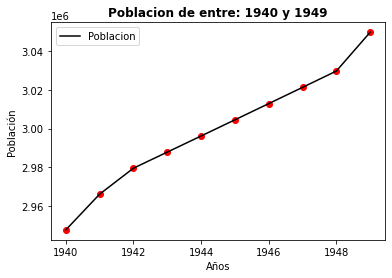

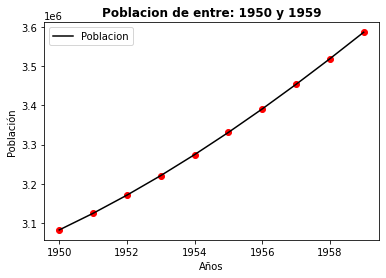

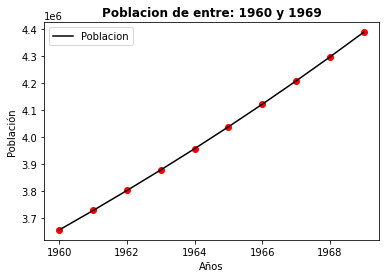

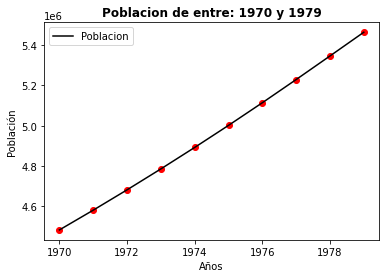

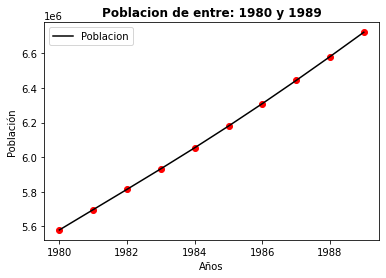

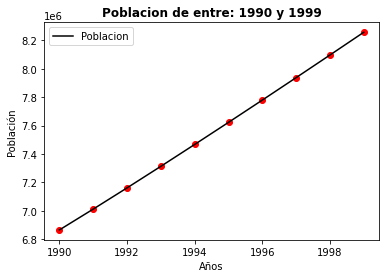

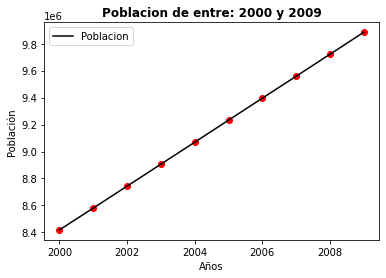

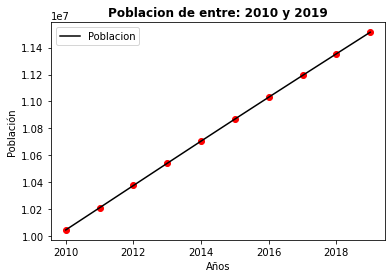

In [40]:
Graficos(BOL10)

## Brasil

In [41]:
Ecuacion, Proyecciones = RegresionPoli(BRA)

El coeficiente de determinacion es: 0.9932520971255326.

La ecuacion del polinomio es: 12615.938673905112x^2 + -47689102.71719357x + 45081705259.387794

Error Cuadrático Medio (MSE) = 27966946998778.523
Raíz del Error Cuadrático Medio (RMSE) = 5288378.484826755


In [42]:
ProyGr(Proyecciones)

Para el año 1900 se estima una poblacion de: 15948710.0
Para el año 1901 se estima una poblacion de: 16212790.0
Para el año 1902 se estima una poblacion de: 16502102.0
Para el año 1903 se estima una poblacion de: 16816646.0
Para el año 1904 se estima una poblacion de: 17156422.0
Para el año 1905 se estima una poblacion de: 17521429.0
Para el año 1906 se estima una poblacion de: 17911669.0
Para el año 1907 se estima una poblacion de: 18327140.0
Para el año 1908 se estima una poblacion de: 18767844.0
Para el año 1909 se estima una poblacion de: 19233779.0
Para el año 1910 se estima una poblacion de: 19724946.0
Para el año 1911 se estima una poblacion de: 20241345.0
Para el año 1912 se estima una poblacion de: 20782976.0
Para el año 1913 se estima una poblacion de: 21349838.0
Para el año 1914 se estima una poblacion de: 21941933.0
Para el año 1915 se estima una poblacion de: 22559259.0
Para el año 1916 se estima una poblacion de: 23201818.0
Para el año 1917 se estima una poblacion de: 238

In [43]:
TasaCreci, Prom = IndiCreci(Proyecciones)

Entre los años 1900 y 1901 hubo una tasa de crecimiento poblacional de: 1.656%
Entre los años 1901 y 1902 hubo una tasa de crecimiento poblacional de: 1.784%
Entre los años 1902 y 1903 hubo una tasa de crecimiento poblacional de: 1.906%
Entre los años 1903 y 1904 hubo una tasa de crecimiento poblacional de: 2.02%
Entre los años 1904 y 1905 hubo una tasa de crecimiento poblacional de: 2.128%
Entre los años 1905 y 1906 hubo una tasa de crecimiento poblacional de: 2.227%
Entre los años 1906 y 1907 hubo una tasa de crecimiento poblacional de: 2.32%
Entre los años 1907 y 1908 hubo una tasa de crecimiento poblacional de: 2.405%
Entre los años 1908 y 1909 hubo una tasa de crecimiento poblacional de: 2.483%
Entre los años 1909 y 1910 hubo una tasa de crecimiento poblacional de: 2.554%
Entre los años 1910 y 1911 hubo una tasa de crecimiento poblacional de: 2.618%
Entre los años 1911 y 1912 hubo una tasa de crecimiento poblacional de: 2.676%
Entre los años 1912 y 1913 hubo una tasa de crecimient

In [44]:
print("Proyecciones de poblacion para años futuros\n") 
Proy = []
for i in range (0,9,1):
    x = [2022,2023,2024,2025,2026,2027,2028,2029,2030]
    y = np.round(Ecuacion[0]*(np.power(x[i],2)) + Ecuacion[1]*(x[i]) + Ecuacion[2])
    Proy.append(y)
    print("Para el año {} se estima una poblacion de: {}".format(x[i],y))
    
print("\n\nTasa de crecimiento para años futuros\n")    
o = 2022
Indeca = [0]
for i in range(1, 9, 1): 
    Pob_o = Proy[i-1]
    Pob_F = Proy[i] if (i<10) else 0 
    i = round((np.power((Pob_F/Pob_o),(1/1))-1)*100,3)
    print("Entre los años {} y {} hubo una tasa de crecimiento poblacional de: {}%".format(o,o+1,i))
    Indeca.append(i)
    o += 1
Prom = np.round(sum(Indeca)/9,3)
print("El promedio de la tasa de crecimiento poblacional de por año es: {}%".format(Prom))

Proyecciones de poblacion para años futuros

Para el año 2022 se estima una poblacion de: 234402978.0
Para el año 2023 se estima una poblacion de: 237745348.0
Para el año 2024 se estima una poblacion de: 241112949.0
Para el año 2025 se estima una poblacion de: 244505782.0
Para el año 2026 se estima una poblacion de: 247923847.0
Para el año 2027 se estima una poblacion de: 251367143.0
Para el año 2028 se estima una poblacion de: 254835672.0
Para el año 2029 se estima una poblacion de: 258329432.0
Para el año 2030 se estima una poblacion de: 261848425.0


Tasa de crecimiento para años futuros

Entre los años 2022 y 2023 hubo una tasa de crecimiento poblacional de: 1.426%
Entre los años 2023 y 2024 hubo una tasa de crecimiento poblacional de: 1.416%
Entre los años 2024 y 2025 hubo una tasa de crecimiento poblacional de: 1.407%
Entre los años 2025 y 2026 hubo una tasa de crecimiento poblacional de: 1.398%
Entre los años 2026 y 2027 hubo una tasa de crecimiento poblacional de: 1.389%
Entre 

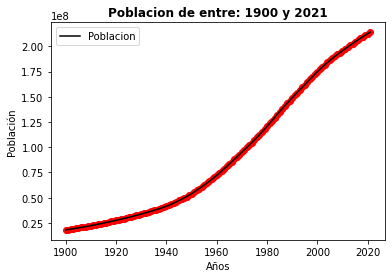

In [45]:
Grafico(BRA)

### Regresiones, proyecciones y tasas de crecimiento de Brasil por décadas

In [46]:
ResulRegre = RegresionesDeca(BRA10)

Poblacion de entre: 1900 y 1909
El coeficiente de determinacion es: 0.9999846684313951.
La pendiente de la recta es: 1.0215674400570027.
El intercepto de la recta es: 4.4644777682339295e-11.

Poblacion de entre: 1910 y 1919
El coeficiente de determinacion es: 0.9999988014058341.
La pendiente de la recta es: 1.0213004268317094.
El intercepto de la recta es: 7.353115039637115e-11.

Poblacion de entre: 1920 y 1929
El coeficiente de determinacion es: 0.9999986825490405.
La pendiente de la recta es: 1.0205238737382818.
El intercepto de la recta es: 3.1664443815905287e-10.

Poblacion de entre: 1930 y 1939
El coeficiente de determinacion es: 0.9999852685516729.
La pendiente de la recta es: 1.0205540823586796.
El intercepto de la recta es: 2.9897752243893894e-10.

Poblacion de entre: 1940 y 1949
El coeficiente de determinacion es: 0.999933108634219.
La pendiente de la recta es: 1.0263699644077748.
El intercepto de la recta es: 4.879907255032842e-15.

Poblacion de entre: 1950 y 1959
El coeficie

In [47]:
ResulPro = ProyDeca(ResulRegre)

Para el año 1900 se estima una poblacion de: 18078036
Para el año 1910 se estima una poblacion de: 22370824
Para el año 1920 se estima una poblacion de: 27609346
Para el año 1930 se estima una poblacion de: 33819362
Para el año 1940 se estima una poblacion de: 41499638
Para el año 1950 se estima una poblacion de: 54037882
Para el año 1960 se estima una poblacion de: 72352012
Para el año 1970 se estima una poblacion de: 95183796
Para el año 1980 se estima una poblacion de: 121146370
Para el año 1990 se estima una poblacion de: 149293825
Para el año 2000 se estima una poblacion de: 175355411
Para el año 2010 se estima una poblacion de: 195933053
Para el año 2020 se estima una poblacion de: 212265367


In [48]:
TasasCreci = IndiCreciDeca(ResulPro)

En la decada comprendida entre 1900 y 1910 hubo una tasa de crecimiento poblacional de: 2.153%
En la decada comprendida entre 1910 y 1920 hubo una tasa de crecimiento poblacional de: 2.126%
En la decada comprendida entre 1920 y 1930 hubo una tasa de crecimiento poblacional de: 2.05%
En la decada comprendida entre 1930 y 1940 hubo una tasa de crecimiento poblacional de: 2.068%
En la decada comprendida entre 1940 y 1950 hubo una tasa de crecimiento poblacional de: 2.675%
En la decada comprendida entre 1950 y 1960 hubo una tasa de crecimiento poblacional de: 2.962%
En la decada comprendida entre 1960 y 1970 hubo una tasa de crecimiento poblacional de: 2.781%
En la decada comprendida entre 1970 y 1980 hubo una tasa de crecimiento poblacional de: 2.441%
En la decada comprendida entre 1980 y 1990 hubo una tasa de crecimiento poblacional de: 2.111%
En la decada comprendida entre 1990 y 2000 hubo una tasa de crecimiento poblacional de: 1.622%
En la decada comprendida entre 2000 y 2010 hubo una

### Gráficos de Brasil por décadas

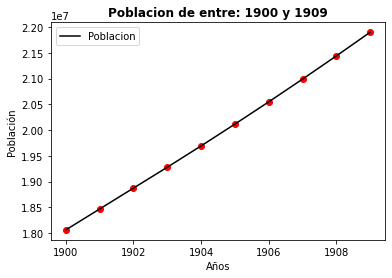

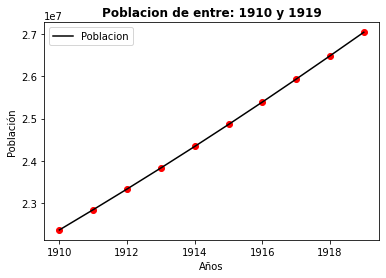

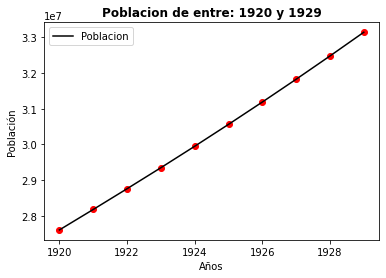

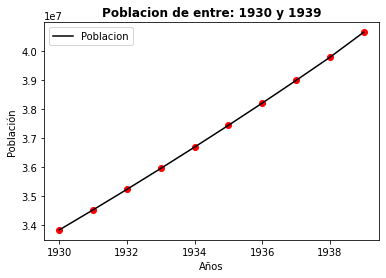

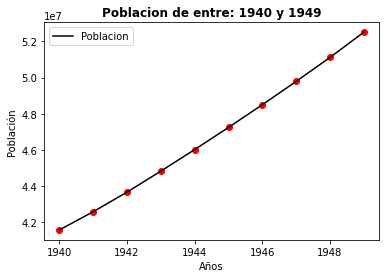

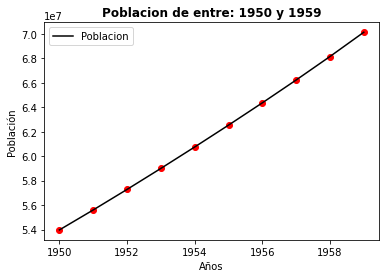

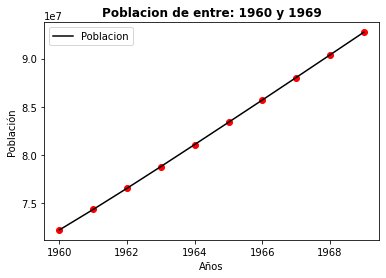

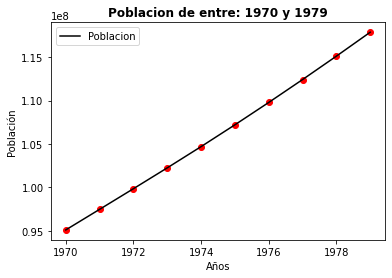

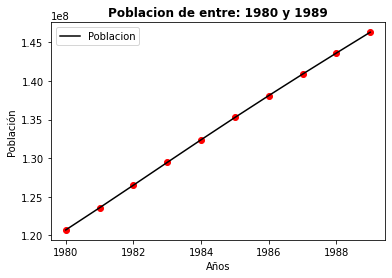

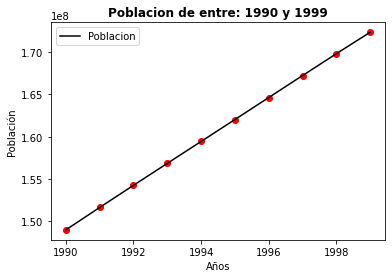

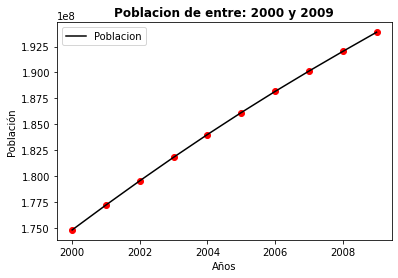

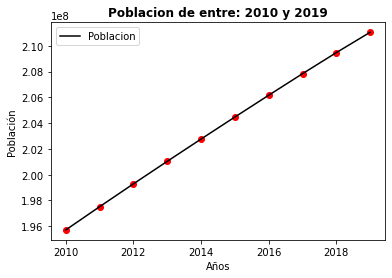

In [49]:
Graficos(BRA10)

## Chile

In [50]:
Ecuacion, Proyecciones = RegresionPoli(CHL)

El coeficiente de determinacion es: 0.998244005556162.

La ecuacion del polinomio es: 854.4120540206917x^2 + -3211462.2989180475x + 3020314919.106017

Error Cuadrático Medio (MSE) = 43543231913.44262
Raíz del Error Cuadrático Medio (RMSE) = 208670.15098821063


In [51]:
ProyGr(Proyecciones)

Para el año 1900 se estima una poblacion de: 2964066.0
Para el año 1901 se estima una poblacion de: 3000224.0
Para el año 1902 se estima una poblacion de: 3038091.0
Para el año 1903 se estima una poblacion de: 3077666.0
Para el año 1904 se estima una poblacion de: 3118951.0
Para el año 1905 se estima una poblacion de: 3161944.0
Para el año 1906 se estima una poblacion de: 3206646.0
Para el año 1907 se estima una poblacion de: 3253057.0
Para el año 1908 se estima una poblacion de: 3301177.0
Para el año 1909 se estima una poblacion de: 3351005.0
Para el año 1910 se estima una poblacion de: 3402542.0
Para el año 1911 se estima una poblacion de: 3455789.0
Para el año 1912 se estima una poblacion de: 3510744.0
Para el año 1913 se estima una poblacion de: 3567407.0
Para el año 1914 se estima una poblacion de: 3625780.0
Para el año 1915 se estima una poblacion de: 3685861.0
Para el año 1916 se estima una poblacion de: 3747652.0
Para el año 1917 se estima una poblacion de: 3811151.0
Para el añ

In [52]:
TasaCreci, Prom = IndiCreci(Proyecciones)

Entre los años 1900 y 1901 hubo una tasa de crecimiento poblacional de: 1.22%
Entre los años 1901 y 1902 hubo una tasa de crecimiento poblacional de: 1.262%
Entre los años 1902 y 1903 hubo una tasa de crecimiento poblacional de: 1.303%
Entre los años 1903 y 1904 hubo una tasa de crecimiento poblacional de: 1.341%
Entre los años 1904 y 1905 hubo una tasa de crecimiento poblacional de: 1.378%
Entre los años 1905 y 1906 hubo una tasa de crecimiento poblacional de: 1.414%
Entre los años 1906 y 1907 hubo una tasa de crecimiento poblacional de: 1.447%
Entre los años 1907 y 1908 hubo una tasa de crecimiento poblacional de: 1.479%
Entre los años 1908 y 1909 hubo una tasa de crecimiento poblacional de: 1.509%
Entre los años 1909 y 1910 hubo una tasa de crecimiento poblacional de: 1.538%
Entre los años 1910 y 1911 hubo una tasa de crecimiento poblacional de: 1.565%
Entre los años 1911 y 1912 hubo una tasa de crecimiento poblacional de: 1.59%
Entre los años 1912 y 1913 hubo una tasa de crecimient

In [53]:
print("Proyecciones de poblacion para años futuros\n") 
Proy = []
for i in range (0,9,1):
    x = [2022,2023,2024,2025,2026,2027,2028,2029,2030]
    y = np.round(Ecuacion[0]*(np.power(x[i],2)) + Ecuacion[1]*(x[i]) + Ecuacion[2])
    Proy.append(y)
    print("Para el año {} se estima una poblacion de: {}".format(x[i],y))
    
print("\n\nTasa de crecimiento para años futuros\n")    
o = 2022
Indeca = [0]
for i in range(1, 9, 1): 
    Pob_o = Proy[i-1]
    Pob_F = Proy[i] if (i<10) else 0 
    i = round((np.power((Pob_F/Pob_o),(1/1))-1)*100,3)
    print("Entre los años {} y {} hubo una tasa de crecimiento poblacional de: {}%".format(o,o+1,i))
    Indeca.append(i)
    o += 1
Prom = np.round(sum(Indeca)/9,3)
print("El promedio de la tasa de crecimiento poblacional de por año es: {}%".format(Prom))

Proyecciones de poblacion para años futuros

Para el año 2022 se estima una poblacion de: 19988163.0
Para el año 2023 se estima una poblacion de: 20232797.0
Para el año 2024 se estima una poblacion de: 20479141.0
Para el año 2025 se estima una poblacion de: 20727193.0
Para el año 2026 se estima una poblacion de: 20976954.0
Para el año 2027 se estima una poblacion de: 21228424.0
Para el año 2028 se estima una poblacion de: 21481602.0
Para el año 2029 se estima una poblacion de: 21736489.0
Para el año 2030 se estima una poblacion de: 21993086.0


Tasa de crecimiento para años futuros

Entre los años 2022 y 2023 hubo una tasa de crecimiento poblacional de: 1.224%
Entre los años 2023 y 2024 hubo una tasa de crecimiento poblacional de: 1.218%
Entre los años 2024 y 2025 hubo una tasa de crecimiento poblacional de: 1.211%
Entre los años 2025 y 2026 hubo una tasa de crecimiento poblacional de: 1.205%
Entre los años 2026 y 2027 hubo una tasa de crecimiento poblacional de: 1.199%
Entre los años 

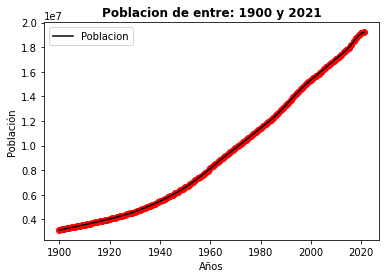

In [54]:
Grafico(CHL)

### Regresiones, proyecciones y tasas de crecimiento de Chile por décadas

In [55]:
ResulRegre = RegresionesDeca(CHL10)

Poblacion de entre: 1900 y 1909
El coeficiente de determinacion es: 0.9999892449049121.
La pendiente de la recta es: 1.0126870615451955.
El intercepto de la recta es: 0.0001240165371543663.

Poblacion de entre: 1910 y 1919
El coeficiente de determinacion es: 0.9999275906064586.
La pendiente de la recta es: 1.0125780826731412.
El intercepto de la recta es: 0.00015234867949553117.

Poblacion de entre: 1920 y 1929
El coeficiente de determinacion es: 0.9999527743385861.
La pendiente de la recta es: 1.013666135662783.
El intercepto de la recta es: 1.9344614141296777e-05.

Poblacion de entre: 1930 y 1939
El coeficiente de determinacion es: 0.9999483482687073.
La pendiente de la recta es: 1.0170295688620499.
El intercepto de la recta es: 3.2388722248734207e-08.

Poblacion de entre: 1940 y 1949
El coeficiente de determinacion es: 0.999982130465982.
La pendiente de la recta es: 1.0187602271392544.
El intercepto de la recta es: 1.1973104529484847e-09.

Poblacion de entre: 1950 y 1959
El coeficie

In [56]:
ResulPro = ProyDeca(ResulRegre)

Para el año 1900 se estima una poblacion de: 3136722
Para el año 1910 se estima una poblacion de: 3558912
Para el año 1920 se estima una poblacion de: 4025695
Para el año 1930 se estima una poblacion de: 4615328
Para el año 1940 se estima una poblacion de: 5468283
Para el año 1950 se estima una poblacion de: 6591063
Para el año 1960 se estima una poblacion de: 8162120
Para el año 1970 se estima una poblacion de: 9792332
Para el año 1980 se estima una poblacion de: 11399743
Para el año 1990 se estima una poblacion de: 13316107
Para el año 2000 se estima una poblacion de: 15349909
Para el año 2010 se estima una poblacion de: 16999318
Para el año 2020 se estima una poblacion de: 19084858


In [57]:
TasasCreci = IndiCreciDeca(ResulPro)

En la decada comprendida entre 1900 y 1910 hubo una tasa de crecimiento poblacional de: 1.271%
En la decada comprendida entre 1910 y 1920 hubo una tasa de crecimiento poblacional de: 1.24%
En la decada comprendida entre 1920 y 1930 hubo una tasa de crecimiento poblacional de: 1.376%
En la decada comprendida entre 1930 y 1940 hubo una tasa de crecimiento poblacional de: 1.71%
En la decada comprendida entre 1940 y 1950 hubo una tasa de crecimiento poblacional de: 1.885%
En la decada comprendida entre 1950 y 1960 hubo una tasa de crecimiento poblacional de: 2.161%
En la decada comprendida entre 1960 y 1970 hubo una tasa de crecimiento poblacional de: 1.838%
En la decada comprendida entre 1970 y 1980 hubo una tasa de crecimiento poblacional de: 1.532%
En la decada comprendida entre 1980 y 1990 hubo una tasa de crecimiento poblacional de: 1.566%
En la decada comprendida entre 1990 y 2000 hubo una tasa de crecimiento poblacional de: 1.432%
En la decada comprendida entre 2000 y 2010 hubo una 

### Gráficos de Chile por décadas

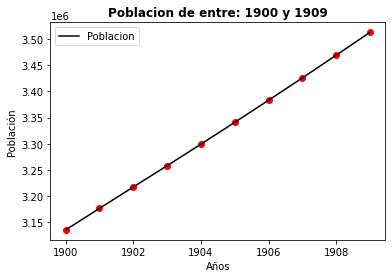

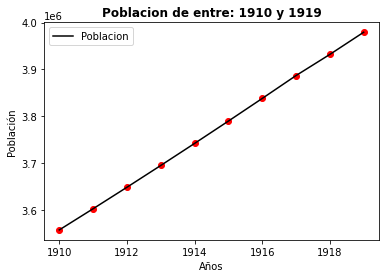

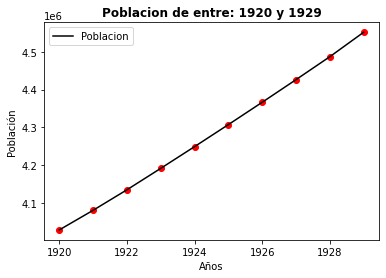

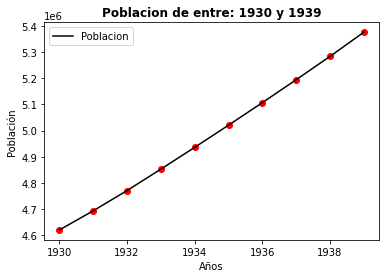

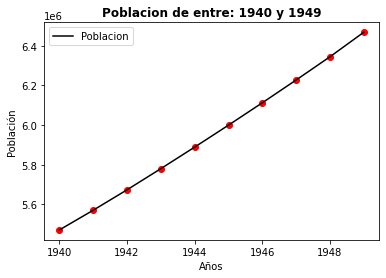

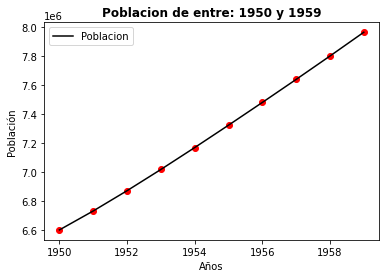

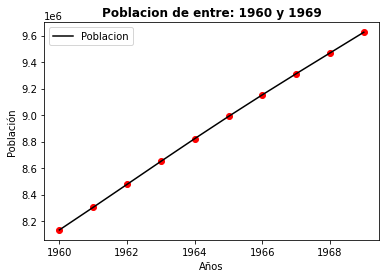

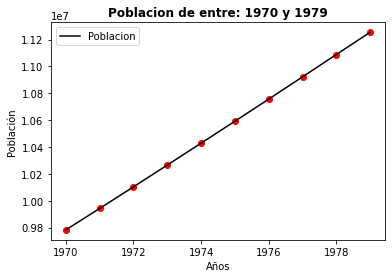

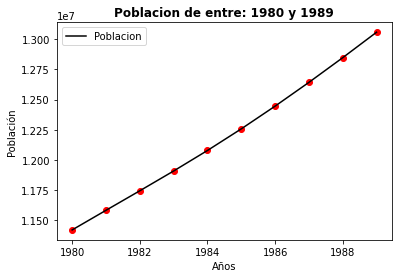

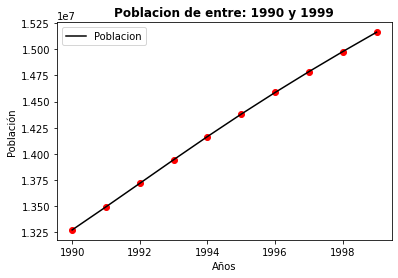

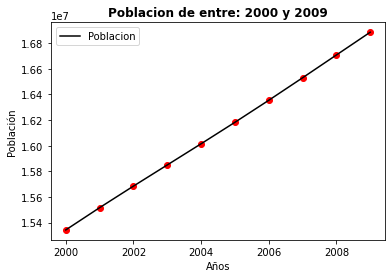

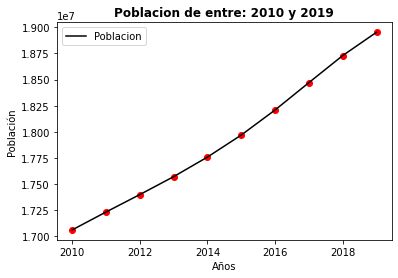

In [58]:
Graficos(CHL10)